In [1]:
import matplotlib.pyplot as plt

import numpy as np
import time
import itertools

from ProbabilisticDiffusion import Diffusion
import torch
import matplotlib.pyplot as plt
import os
import sys

/opt/anaconda3/envs/pytorch/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def tweedies(data, dist, plot_grad=True, plot_density=True, plot_tweedies=True, min_val=-0.5, max_val=0.5):
    # Tweedies formula
    covariance = np.cov(data.numpy().T)
    with tf.GradientTape() as tape:
        tape.watch(data)
        prob = dist.prob(data)
        gradients = tape.gradient(prob, data)
    
    gradients = gradients.numpy()
    prob = prob.numpy()
    prob_div = prob.reshape((len(gradients), 1))
    tweedies = data.numpy() + np.clip((covariance @ (gradients / prob_div).T).T, min_val, max_val) #Clip quotient for stability
    # Plot flags
    if plot_grad:
        sum_grads = np.sum(gradients, axis=1)
        plt.scatter(data[:,0], data[:,1], c=np.clip(sum_grads, min_val, max_val), s=7 , cmap='Spectral')
        plt.title('Gradients')
        cbar = plt.colorbar()
        plt.show()
    if plot_density:
        plt.scatter(data[:,0], data[:,1], c=prob, s=7 , cmap='Spectral')
        plt.title('Density')
        cbar = plt.colorbar()
        plt.show()
    if plot_tweedies:
        plt.scatter(data[:,0], data[:,1], c=sum(np.clip((gradients/prob_div).T, min_val, max_val)), s=7 , cmap='Spectral')
        plt.title('Quotient Term')
        cbar = plt.colorbar()
        plt.show()
        plt.scatter(data[:,0], data[:,1], c=sum(np.clip((covariance @ (gradients / prob_div).T), min_val, max_val)), s=7 , cmap='Spectral')
        plt.title('Tweedies Term')
        cbar = plt.colorbar()
        plt.show()
    return tweedies


def generate_circular(n, size):
    radians = np.random.uniform(low=0.0, high=2*np.pi, size=n)
    x = size * np.cos(radians)
    y = size * np.sin(radians)
    return x, y

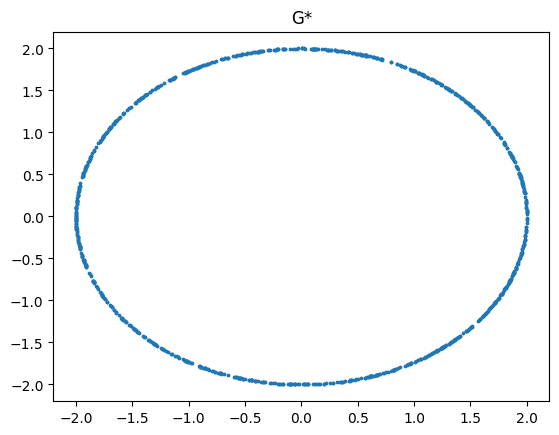

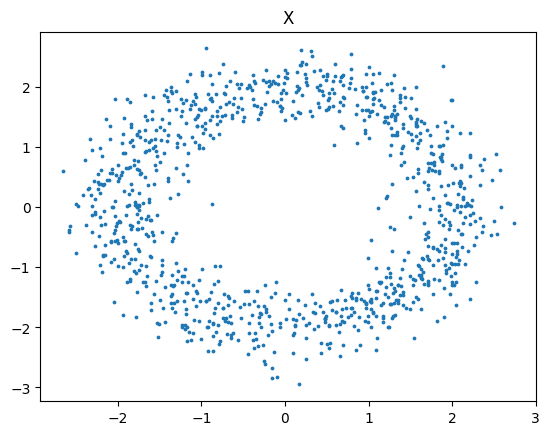

In [3]:
n=1000
x_orig, y_orig = generate_circular(n, 2)

plt.scatter(x_orig, y_orig, s=3)
plt.title('G*')
plt.show()

x = x_orig + np.random.normal(loc=0.0, scale=0.3, size=n)
y = y_orig + np.random.normal(loc=0.0, scale=0.3, size=n)

plt.scatter(x, y, s=3)
plt.title('X')
plt.show()

In [4]:
data = torch.stack([torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)],dim=1)

In [5]:
model = Diffusion(data, 100,
                 0.0001, 0.1, 'linear',
                 torch.nn.Module, 1,
                 torch.nn.Module, 1,
                 1, 1)

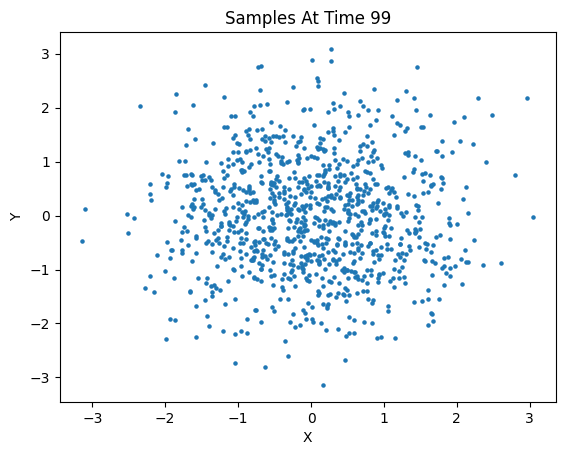

In [6]:
noised = model.forward(99)